# Classification: Exercices

## Imports and Parameters

In [27]:
import pandas as pd
import numpy as np
from pathlib import Path

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [28]:
import joblib
models_path = Path('../models')

In [13]:
# Used for sound signal
from playsound import playsound
alarm_file = Path().parent / '../Sounds' / 'alarm.wav'

1. Try to build a classifier for the MNIST dataset that achieves over 97%
accuracy on the test set. Hint: the KNeighborsClassifier works
quite well for this task; you just need to find good hyperparameter
values (try a grid search on the weights and n_neighbors
hyperparameters).

In [14]:
# Get the data
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [15]:
# Divide the data into training and test sets
from sklearn.model_selection import train_test_split

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Usefull function to plot the images
def plot_digit(data, shape=(28, 28), figsize=(3,3), cmap='binary', interpolation='nearest'):
	image = data.reshape(shape)
	plt.figure(figsize=figsize)
	plt.imshow(image, cmap=cmap, interpolation=interpolation)
	plt.axis('off')

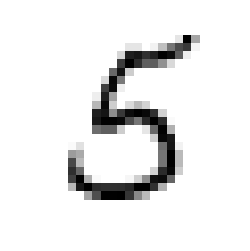

In [17]:
some_index = 0
plot_digit(X_train[some_index])

In [18]:
# Using a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)

In [19]:
# Cross-val with this hyperparameter
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

In [20]:
scores

array([0.97037553, 0.97198264, 0.96940962])

In [21]:
def weight_function(distances):
	if distances == 0:
		return 1
	else:
		return 1 / distances**2

In [22]:
# Using GridSearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': [2, 3, 4, 5], 'weights': ['uniform', 'distance', weight_function]}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
playsound(alarm_file)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\Denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [0.96073212 0.96726783        nan 0.96844642 0.96971427        nan
 0.96685711 0.97058926        nan 0.96739284 0.96866069        nan]
  warnings.warn(


In [23]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 4, 'weights': 'distance'}
0.9705892646492343


In [24]:
grid_search.best_estimator_.predict([X_train[some_index]])

array(['5'], dtype=object)

In [25]:
knn_best = grid_search.best_estimator_

In [26]:
knn_best.score(X_test, y_test)

0.9731428571428572

In [29]:
# Save the model
joblib.dump(knn_best, models_path / 'E1_knn.pkl')

['..\\models\\E1_knn.pkl']